# <i class="fa-solid fa-lightbulb"></i> Naïve Bayes

Naïve Bayes classifiers, like LDA and QDA, are generative models. They aim to model how the data was generated for each class and use this knowledge to make predictions. The foundation of Naïve Bayes is Bayes’ Theorem.

## Bayes’ Theorem

Imagine you're trying to assess whether someone is likely to be experiencing anxiety based on a behavioural cue like nail biting. What you're really after is:

> What’s the probability that a person has anxiety, given that they bite their nails?

In probability notation, we can write this as:

$$
P(\text{Anxiety} \mid \text{Nail biting})
$$

This is called a *conditional probability*: it expresses how likely one event is (anxiety) given that another has occurred (nail biting).

Now, here’s the tricky part: directly estimating how often people who bite their nails are anxious might be hard. But we might already know a few other things:

- What percentage of people in general are anxious: $P(\text{Anxiety})$
- Among those with anxiety, how common is nail biting: $P(\text{Nail biting} \mid \text{Anxiety})$
- How common is nail biting in the population overall: $P(\text{Nail biting})$

Bayes’ Theorem allows us to flip the conditional and compute the probability we care about:

$$
P(\text{Anxiety} \mid \text{Nail biting}) = \frac{P(\text{Nail biting} \mid \text{Anxiety}) \cdot P(\text{Anxiety})}{P(\text{Nail biting})}
$$

This is useful because:

- Directly measuring $P(\text{Anxiety} \mid \text{Nail biting})$ might be hard.
- But we can estimate how common anxiety is in general, and how likely anxious people are to bite their nails.
- Bayes’ Theorem brings all this together!


What we just did with anxiety and nail biting is exactly what a Naïve Bayes classifier does, just with more features and more classes. In general machine learning notation, we replace:

- “Anxiety” with a class label $Y = k$
- “Nail biting” (or more features) with a full observation $X = x$

This gives us the general form of Bayes’ Theorem used in classification:

$$
P(Y = k \mid X = x) = \frac{P(X = x \mid Y = k) \cdot P(Y = k)}{P(X = x)}
$$

Where:

- $P(Y = k \mid X = x)$: **Posterior** – the probability of class $k$ given the features $x$
- $P(X = x \mid Y = k)$: **Likelihood** – the probability of seeing those features if the class is $k$
- $P(Y = k)$: **Prior** – how frequent the class is in general
- $P(X = x)$: **Evidence** – the overall probability of seeing $x$ (same across all classes)

This is already everything we need to build classifiers that estimate the most likely class $Y$ based on input features $X$.


## The Naïve Assumption

To compute the likelihood term $P(X \mid Y = k)$ — that is, how likely we are to observe a particular combination of features for a given class—we usually need a complex model that captures how all the features interact.

Naïve Bayes makes a simplifying assumption:

> 💡 All features are conditionally independent given the class.

Let’s return to our example. Suppose you're trying to predict whether a person is anxious based on multiple behavioural features:

- Nail biting (NB)
- Fidgeting (FI)
- Avoiding eye contact (EC)

In reality, these features are probably not independent. For example, people who are fidgety might also tend to avoid eye contact. However, modelling all these interactions can become very complex, so Naïve Bayes says: 

> “Let’s assume that once we know whether someone is anxious or not, these behaviours don’t influence each other anymore.”

Mathematically, this means:

$$
P(\text{NB, FI, EC} \mid \text{Anxiety}) = P(\text{NB} \mid \text{Anxiety}) \cdot P(\text{FI} \mid \text{Anxiety}) \cdot P(\text{EC} \mid \text{Anxiety})
$$

This assumption is clearly naïve (we know behaviours are interrelated) but it simplifies things a lot, especially when we have many features. And surprisingly, this assumption often works well enough in practice to make useful predictions! 

So in general terms, for a feature vector $X = (X_1, X_2, \dots, X_p)$, the likelihood simplifies to:

$$
P(X = x \mid Y = k) = \prod_{j=1}^{p} P(X_j = x_j \mid Y = k)
$$

---

## The Algorithm

To understand how Naïve Bayes works in practice, we will walk through a simple version of the algorithm using categorical (discrete) features: Discrete Naïve Bayes. Here, likelihoods are calculated from frequency tables rather than continuous distributions.

### 1. Estimate priors

Priors are the class probabilities in the training data:

$$P(Y = k) = \text{Proportion of samples in class } k$$

If we assume our training data has 60% anxious (A) and 40% not anxious (NA) people, we have:

$$P(\text{A}) = 0.6$$
$$P(\text{NA}) = 0.4$$

### 2. Estimate class-conditional likelihoods

For each feature $X_j$, estimate the likelihood of observing $x_j$ given class $k$

$$P(X_j = x_j \mid Y = k)$$  

For our example, let us assume the following likelihoods in the training data:

| Feature              | $P(\cdot \mid \text{Anxious})$ | $P(\cdot \mid \text{Not Anxious})$ |
|----------------------|--------------------------------|------------------------------------|
| Nail Biting (NB=yes) | 0.8                            | 0.3                                |
| Fidgeting (FI=yes)   | 0.7                            | 0.2                                |
| Eye Contact (EC=no)  | 0.6                            | 0.4                                |

*Note: We use **EC = no** because we’re modelling *avoiding* eye contact.*

### 3. Compute the posterior

Using Bayes’ Theorem: 

$$P(Y = k \mid X = x) \propto P(Y = k) \cdot \prod_{j=1}^{p} P(X_j = x_j \mid Y = k)$$

Suppose we observe a person who bites their nails, is fidgeting, and avoids eye contact. We can then compute the unnormalised posteriors:

**Anxious (A)**:

$$
P(\text{A}) \cdot P(\text{NB} \mid \text{A}) \cdot P(\text{FI} \mid \text{A}) \cdot P(\text{EC=no} \mid \text{A}) \\
= 0.6 \cdot 0.8 \cdot 0.7 \cdot 0.6 = 0.2016
$$

**Not Anxious (NA)**:

$$
P(NA) \cdot P(\text{NB} \mid \text{NA}) \cdot P(\text{FI} \mid \text{NA}) \cdot P(\text{EC=no} \mid \text{NA}) \\
= 0.4 \cdot 0.3 \cdot 0.2 \cdot 0.4 = 0.0096
$$

### 4. Make a prediction

For the prediction, we can simply choose the class with the highest posterior probability:

$$\hat{Y} = \arg \max_k P(Y = k \mid X = x)$$

If we compare the posterior scores for our example, we have:

- Anxious: 0.2016  
- Not Anxious: 0.0096

Since $0.2016 > 0.0096$, the model predicts:

$$
\hat{Y} = \text{Anxious}
$$

In case of a tie, the model would likely default to the class with the higher prior. However, this might be subject to the specific implementation of the model.

For the classification, this is already enough. However, we can also normalise the posterior probabilities to sum to 1. For this, we simply divide each score by the total:

$$
P(\text{A} \mid X) = \frac{S_A}{S_A + S_{NA}} = \frac{0.2016}{0.2016 + 0.0096} = \frac{0.2016}{0.2112} \approx 0.954
$$

$$
P(\text{NA} \mid X) = \frac{S_{NA}}{S_A + S_{NA}} = \frac{0.0096}{0.2016 + 0.0096} = \frac{0.0096}{0.2112} \approx 0.045
$$


### Quiz

In [1]:
from jupyterquiz import display_quiz
display_quiz("quiz/NaiveBayes.json", shuffle_answers=True)

<IPython.core.display.Javascript object>

```{admonition} Solution
:class: dropdown

To solve this, we use the same priors and likelihoods as before, but change the feature values:

- NB = **no** → use $P(\text{NB=no} \mid Y) = 1 - P(\text{NB=yes} \mid Y)$
- FI = **yes**
- EC = **yes** → so $P(\text{EC=yes} \mid Y) = 1 - P(\text{EC=no} \mid Y)$

---

**For Anxious (A):**

$P(\text{A}) \cdot P(\text{NB=no} \mid \text{A}) \cdot P(\text{FI=yes} \mid \text{A}) \cdot P(\text{EC=yes} \mid \text{A}) =$
$0.6 \cdot (1 - 0.8) \cdot 0.7 \cdot (1 - 0.6) = 0.6 \cdot 0.2 \cdot 0.7 \cdot 0.4 = 0.0336$

**For Not Anxious (NA):**

$0.4 \cdot (1 - 0.3) \cdot 0.2 \cdot (1 - 0.4) = 0.4 \cdot 0.7 \cdot 0.2 \cdot 0.6 = 0.0336$

Result: Both scores are equal -> it's a tie.

```

---

**Result:** Both scores are equal → it's a **tie**.

✅ **Correct answer: Tie**



---

## Gaussian Naïve Bayes

In Gaussian Naïve Bayes, we assume that the features are **continuous** and that their values follow a **normal distribution** for each class.

This means that for each class $Y = k$ and each feature $X_j$:

$$
P(X_j = x_j \mid Y = k) = \frac{1}{\sqrt{2\pi\sigma_{jk}^2}} \exp\left( -\frac{(x_j - \mu_{jk})^2}{2\sigma_{jk}^2} \right)
$$

So the steps of Naïve Bayes for continuous data become:

1. Estimate class priors: $P(Y = k)$ from class proportions
2. Estimate means and variances $\mu_{jk}$ and $\sigma_{jk}^2$ for each feature and class
3. Plug into the Gaussian formula to compute likelihoods
4. Multiply likelihoods and prior, and choose the class with the highest posterior

This is essentially what `GaussianNB()` in scikit-learn does under the hood.

---

## Gaussian Naïve Bayes in Python

For a quick illustration, we can use the same simulated data as in the LDA/QDA session:

In [2]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Generate synthetic data
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, 
                           n_redundant=0, n_classes=2, n_clusters_per_class=1, 
                           random_state=42);

We can then fit the model:

In [3]:
nb = GaussianNB()
nb.fit(X, y)

y_pred = nb.predict(X) 
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       100
           1       0.85      0.87      0.86       100

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



And finally plot the predicted distributions and classification report

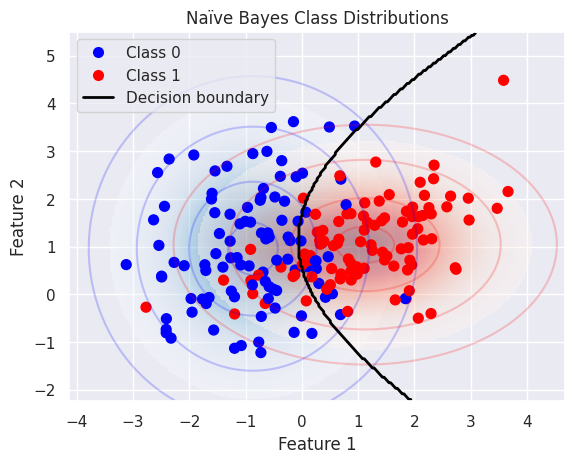

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

sns.set_theme(style="darkgrid")
fig, ax = plt.subplots()

# Grid for likelihood computation
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xg = np.linspace(x_min, x_max, 300)
yg = np.linspace(y_min, y_max, 200)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

# Plot class densities
for label, color in enumerate(['blue', 'red']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolormesh(xx, yy, Pm.reshape(xx.shape), shading='auto', alpha=0.4, cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape), levels=[0.01, 0.1, 0.5, 0.9], colors=color, alpha=0.2);

# Plot decision boundary
Z = nb.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='black')

# Scatter plot
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

# Legend
ax.set(xlabel="Feature 1", ylabel="Feature 2", title="Naïve Bayes Class Distributions")
legend_elements = [
    Line2D([], [], marker='o', linestyle='None', markerfacecolor='blue',
           markeredgewidth=0, label='Class 0', markersize=8),
    Line2D([], [], marker='o', linestyle='None', markerfacecolor='red',
           markeredgewidth=0, label='Class 1', markersize=8),
    Line2D([], [], color='black', linestyle='-', linewidth=2, label='Decision boundary')
]
ax.legend(handles=legend_elements);

This plot visualises how the Gaussian Naïve Bayes model estimates the class distributions:

- Each class is modelled as a multivariate Gaussian distribution (with independent features)
- The coloured contours represent density levels of the Gaussian likelihoods $P(X \mid Y = k)$
- The shaded background shows regions of higher probability under each class
- The decision boundary between the two classes lies where the posterior probabilities are equal

---

## Summary

| Feature                       | **LDA**                         | **QDA**                        | **Naïve Bayes**                               |
|-------------------------------|---------------------------------|--------------------------------|-----------------------------------------------|
| **Model Type**                | Generative                      | Generative                     | Generative                                    |
| **Assumes Normality?**        | ✅ Yes (Multivariate Gaussian)  | ✅ Yes (Multivariate Gaussian) | ✅ Often (e.g. GaussianNB), but flexible      |
| **Covariance Matrices**       | Shared across classes           | Separate for each class        | Diagonal (assumes independence)               |
| **Feature Independence?**     | ❌ No                           | ❌ No                          | ✅ Yes (Naïve assumption)                     |
| **Decision Boundary**         | Linear                          | Quadratic                      | Linear or non-linear (distribution-dependent) | 
| **Likelihood Shape**          | Multivariate Gaussian           | Multivariate Gaussian          | Product of 1D distributions                   |
| **Flexibility**               | Low                             | Medium                         | High (especially for text/categorical data)   |
| **Good for High Dimensions?** | ❌ Not ideal                    | ❌ Risk of overfitting         | ✅ Yes                                        |
| **When to Use**               | Equal spread across classes     | Unequal class spreads          | Many features, text data, simple baseline     |

That's it! You can now head to [Exercise 6](Exercises) to apply LDA, QDA, and Naïve Bayes yourself 😄